In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from time import time

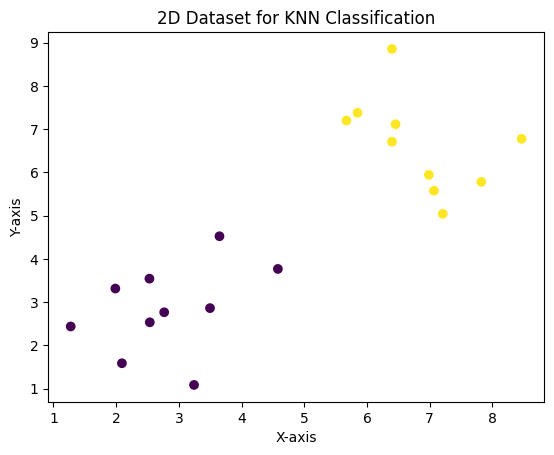

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Class 1
class1_points = np.random.normal(loc=[3, 3], scale=[1, 1], size=(10, 2))

# Class 2
class2_points = np.random.normal(loc=[7, 7], scale=[1, 1], size=(10, 2))

# Combine the points from both classes
all_points = np.concatenate([class1_points, class2_points])

# Create labels for the classes (0 for class 1, 1 for class 2)
labels = np.array([0] * 10 + [1] * 10)

# Scatter plot to visualize the dataset
plt.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
plt.title('2D Dataset for KNN Classification')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [165]:
data = np.concatenate((all_points,np.atleast_2d(labels).reshape(-1,1)), axis=1)
data = pd.DataFrame(data, columns=["X1", "X2", "label"])

In [166]:
X_train, X_test, y_train, y_test = train_test_split(all_points, labels, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 2), (2, 2), (18,), (2,))

In [167]:
X_test

array([[3.49671415, 2.8617357 ],
       [7.82254491, 5.77915635]])

In [168]:
pd.DataFrame(np.concatenate((X_train, np.atleast_2d(y_train).reshape(-1,1)), axis=1))

,0,1,2
0,6.398293,8.852278,1.0
1,3.647689,4.523030,0.0
2,1.987169,3.314247,0.0
3,2.536582,2.534270,0.0
4,7.067528,5.575252,1.0
5,4.579213,3.767435,0.0
6,7.208864,5.040330,1.0
7,6.986503,5.942289,1.0
8,5.849006,7.375698,1.0
9,2.765847,2.765863,0.0


C:\Users\84866\AppData\Local\Temp\ipykernel_12168\2975642372.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:, 0], X_train[:, 1], cmap='viridis', c = 'r', label='train')
C:\Users\84866\AppData\Local\Temp\ipykernel_12168\2975642372.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[:, 0], X_test[:, 1], cmap='viridis', c = 'b', label='test')


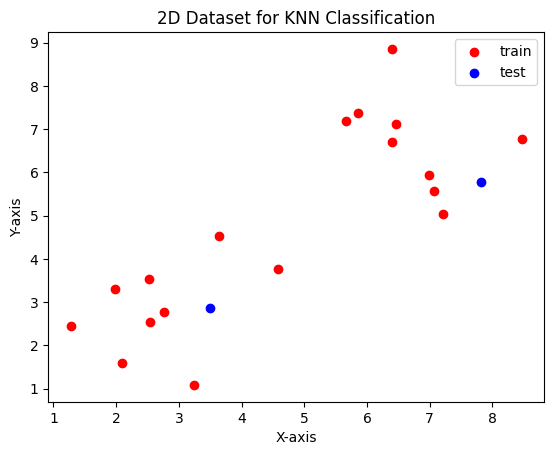

In [169]:
plt.scatter(X_train[:, 0], X_train[:, 1], cmap='viridis', c = 'r', label='train')
plt.scatter(X_test[:, 0], X_test[:, 1], cmap='viridis', c = 'b', label='test')
plt.legend()
plt.title('2D Dataset for KNN Classification')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

$$
Euclidean \ distance: l_1 = ||Z - X||_2^2 = (Z - X)^T(Z - X) = ||Z||_2^2 + ||X||_2^2 - 2X^TZ
$$

In [170]:
test_point = np.atleast_2d(X_test[0, :]).reshape(-1, 2)
test_point

array([[3.49671415, 2.8617357 ]])

In [171]:
def dist_pp(z, X):
    return np.sum((z - X)**2)

In [172]:
def dist_ps_fast(z, X):
    X2 = np.sum(X*X, 1, keepdims=True) # square of l2 norm of each ROW of X
    z2 = np.sum(z*z, 1, keepdims=True) # square of l2 norm of z
    return X2.T + z2 - 2*np.dot(z, X.T)

In [173]:
dist_mat = pairwise_distances(X_test, X_train)
dist_mat

array([[6.65625731, 1.66814014, 1.57591044, 1.01443915, 4.48485035,
        1.41141563, 4.30422189, 4.65493649, 5.09010164, 0.73712883,
        1.89643505, 4.85019304, 1.18196535, 5.17790468, 2.26173482,
        6.32438721, 4.81886558, 1.79320387],
       [3.38711828, 4.35973388, 6.33461837, 6.20247422, 0.78206604,
        3.81657267, 0.96045266, 0.8518091 , 2.538464  , 5.88643645,
        7.09984213, 2.57595241, 5.74524423, 1.9084267 , 7.35081734,
        1.18479602, 1.69963852, 6.55749179]])

In [174]:
k = 12

In [175]:
res = []
for i in dist_mat:
    idx = np.argsort(i)[:k]
    res.append(idx)

In [176]:
label_mat = np.zeros((X_test.shape[0], k))
for i, val1 in enumerate(res):
    for k, val2 in enumerate(val1):
        label_mat[i, k] = y_train[val2]
label_mat = label_mat.astype(dtype='int')
label_mat

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])

In [177]:
res = []
for row in label_mat:     
    most_frequent_value = np.bincount(row).argmax()
    res.append(most_frequent_value)
res, y_test

([0, 1], array([0, 1]))

In [178]:
accuracy_score(y_test, res)

1.0